In [1]:
import pandas as pd 
import seaborn as sns
df = pd.read_csv('/kaggle/input/pre-interview-acceptance/logatta.csv')
df


,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,Travel_Rarely,2,Single,Yes,1,1102,Female,True
1,49,Travel_Frequently,1,Married,No,2,279,Male,False
2,37,Travel_Rarely,2,Single,Yes,4,1373,Male,False
3,33,Travel_Frequently,4,Married,Yes,5,1392,Female,False
4,27,Travel_Rarely,1,Married,No,7,591,Male,False
...,...,...,...,...,...,...,...,...,...
1487,35,Travel_Rarely,3,Married,Yes,1856,682,Male,False
1488,35,Travel_Rarely,4,Divorced,No,1857,1103,Male,False
1489,31,Travel_Rarely,3,Single,Yes,1858,976,Male,False
1490,37,Travel_Rarely,4,Single,No,1859,1351,Female,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1492 non-null   int64 
 1   BusinessTravel              1492 non-null   object
 2   Education                   1492 non-null   int64 
 3   MaritalStatus               1492 non-null   object
 4   OverTime                    1492 non-null   object
 5   EmployeeNumber              1492 non-null   int64 
 6   DailyRate                   1492 non-null   int64 
 7   Gender                      1492 non-null   object
 8   accepted for the interview  1492 non-null   bool  
dtypes: bool(1), int64(4), object(4)
memory usage: 94.8+ KB


In [3]:
df.columns

Index(['Age', 'BusinessTravel', 'Education', 'MaritalStatus', 'OverTime',
       'EmployeeNumber', 'DailyRate', 'Gender', 'accepted for the interview'],
      dtype='object')

In [4]:
df=df.astype({'accepted for the interview':"int32"})

In [5]:
df["BusinessTravel"].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [6]:
from sklearn.preprocessing import OrdinalEncoder
for i in ["BusinessTravel","MaritalStatus"]:
    ordinal =OrdinalEncoder()
    df[[i]]=ordinal.fit_transform(df[[i]])

In [7]:
for i in ["OverTime","Gender"]:
    x=pd.get_dummies(df[[i]])
    x=x.drop(x.columns[-1],axis=1)
    df=pd.concat([df,x],axis=1)
    df=df.drop(i,axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler
for i  in ["DailyRate","Age"] :
    std =StandardScaler()
    df[[i]]=std.fit_transform(df[[i]])

In [9]:
df=df.drop(["EmployeeNumber"],axis=1)

In [10]:
df

,Age,BusinessTravel,Education,MaritalStatus,DailyRate,accepted for the interview,OverTime_No,Gender_Female
0,0.452168,2.0,2,2.0,0.735781,1,0,1
1,1.331314,1.0,1,1.0,-1.303018,0,1,0
2,0.012595,2.0,2,2.0,1.407124,0,0,0
3,-0.426978,1.0,4,1.0,1.454192,0,0,1
4,-1.086338,2.0,1,1.0,-0.530108,0,1,0
...,...,...,...,...,...,...,...,...
1487,-0.207192,2.0,3,1.0,-0.304675,0,0,0
1488,-0.207192,2.0,4,0.0,0.738259,0,1,0
1489,-0.646765,2.0,3,2.0,0.423644,0,0,0
1490,0.012595,2.0,4,2.0,1.352624,0,1,1


<AxesSubplot:>

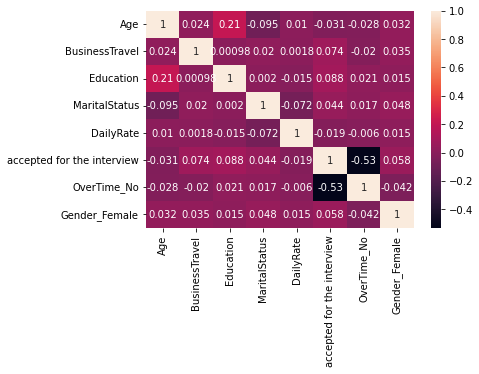

In [11]:
sns.heatmap(df.corr() ,annot=True)

In [12]:
y=df['accepted for the interview']
X=df.drop(['accepted for the interview'],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)

In [17]:
model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(GaussianNB())

In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model_list =('Logistic Regression','Naive Bayes ', ' KNN')
acc_list = []
auc_list =[]
cm_list =[]

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append (round(metrics.auc(fpr, tpr), 2))
    cm_list.append (confusion_matrix(y_test, y_pred))

In [19]:
result_df =pd.DataFrame({'Model':model_list,'Acc':acc_list,'Auc':auc_list})
result_df

,Model,Acc,Auc
0,Logistic Regression,0.908482,0.62
1,Naive Bayes,0.968750,0.86
2,KNN,0.883929,0.92


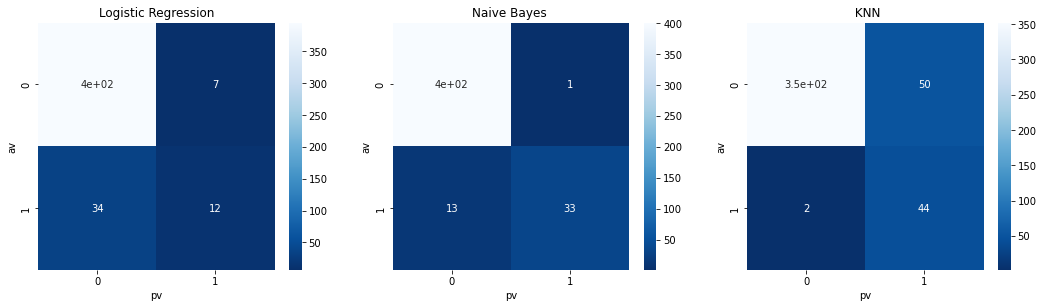

In [20]:
#confusion matrix
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm= cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot=sns.heatmap(cm, annot=True , cmap='Blues_r')
    cm_plot.set_xlabel('pv')
    cm_plot.set_ylabel('av')